# Jupyter Notebook to demonstrate CLUSTERING Algorithms

## Clustering with K-Means, K-Medoids (PAM) using USArrest Data

K-means is an unsupervised clustering algorithm designed to partition unlabelled data into a certain number (thats the “ K”) of distinct groupings. In other words, k-means finds observations that share important characteristics and classifies them together into clusters. A good clustering solution is one that finds clusters such that the observations within each cluster are more similar than the clusters themselves.

There are countless examples of where this automated grouping of data can be extremely useful. For example, consider the case of creating an online advertising campaign for a brand new range of products being released to the market. While we could display a single generic advertisement to the entire population, a far better approach would be to divide the population into clusters of people who hold shared characteristics and interests displaying customised advertisements to each group. K-means is an algorithm that finds these groupings in big datasets where it is not feasible to be done by hand.

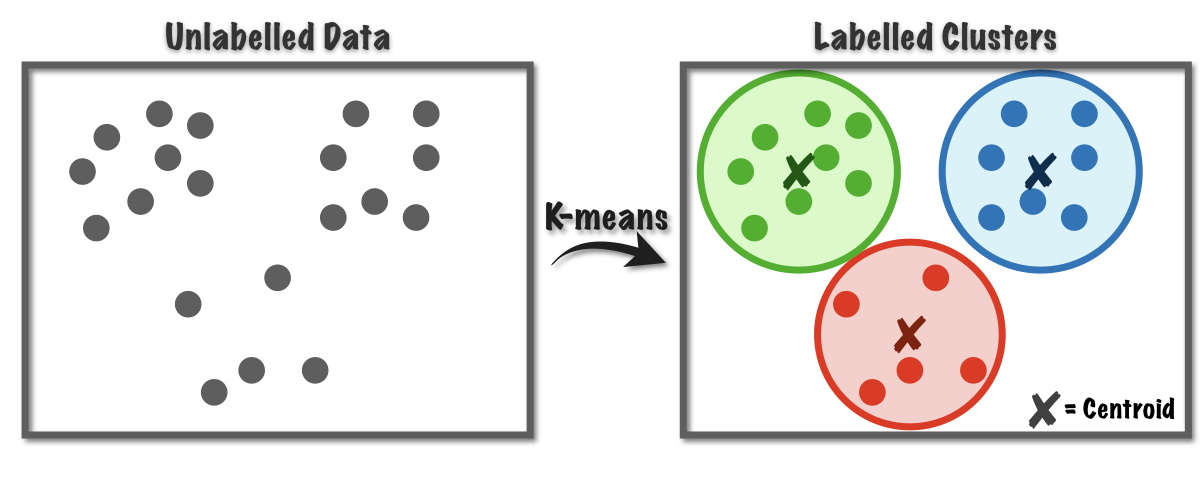



---

Source: KAGGLE https://www.kaggle.com/berkayalan/usarrest-crime-kmeans-clustering-elbow 

This Kaggle notenbook has been adapted and extend to the examples of CAS BIA for Clustering algorithms k-Means and k-Medoids

---
Author: 
*   dr.daniel benninger  
---
History: 
*   v1, June 2021, dbe --- minor adaptions for CAS BIA11
*   


In [ ]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7MB 13.8MB/s 
     |████████████████████████████████| 22.3MB 2.1MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


# from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Data (Up)Load
Das Einlesen von Daten aus einem externen File (txt/csv) bedingt den vorherigen Upload in die Colab Umgebung
Dateien/Files können in das Colab Filesystem hochgeladen und unter **/sample_data** abgelegt und danach im Notebook eingelesen werden
Alterantiv sind Daten und Notebook auch in der indivduellen Google Drive Ablage abgelegt werden


In [ ]:
%ls
# wechsel ins (colab lokale verzeichnis)
%cd /content/sample_data      
# anzeige der vorhandenen dateien
%ls


anscombe.json*                mnist_train_small.csv
california_housing_test.csv   README.md*
california_housing_train.csv  SampleData_USArrests-v2.csv
mnist_test.csv
/content/sample_data
anscombe.json*                mnist_train_small.csv
california_housing_test.csv   README.md*
california_housing_train.csv  SampleData_USArrests-v2.csv
mnist_test.csv


### >>ACHTUNG<<
Datei **SampleData_USArrests-v2.csv** muss zuvor ins Colab Filesystem (unter /content/sample_data hochgeladen werden

In [ ]:
%ls

anscombe.json*                mnist_train_small.csv
california_housing_test.csv   README.md*
california_housing_train.csv  SampleData_USArrests-v2.csv
mnist_test.csv


In [ ]:
# Loading US Arrests Sample Data from external file into dataframe variable 
df = pd.read_csv("SampleData_USArrests-v2.csv").copy()
df.head()
print(df.head(5))

        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [ ]:
# Dataframe structure verification
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [ ]:
# Making Urban Names as İndex
df.index = df.iloc[:,0]
df= df.iloc[:,1:5]

In [ ]:
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

# Initial (descriptive) Analysis

**Histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b23281590>,
      dtype=object)

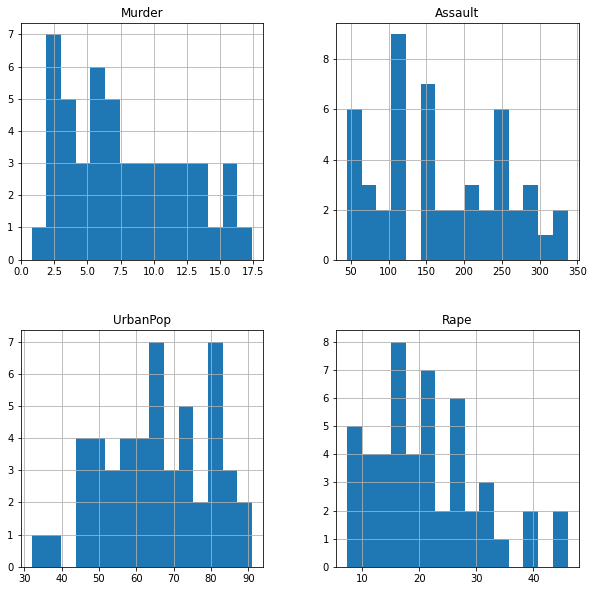

In [ ]:
df.hist(bins=15,figsize=(10,10))

Calculate the **Magic Five** statistical measure (i.e. Tukey Measure) for each variable and visualize with **Boxplot** diagrams

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


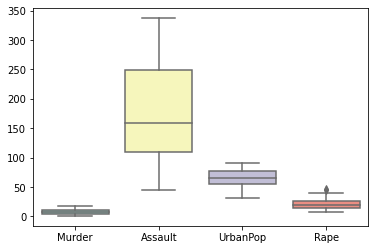

In [ ]:
diag_box = sns.boxplot(data=df, orient="v", palette="Set2")

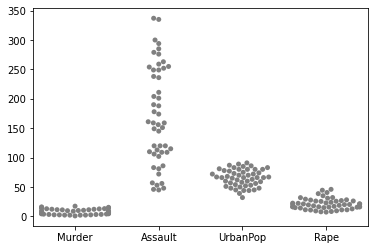

In [ ]:
diag_box = sns.swarmplot(data=df, color="gray")

In [ ]:
diag_box = sns.boxplot(data=df, orient="v", palette="Set3")
diag_box = sns.swarmplot(data=df, color="gray")

# Normalize all variables using z-Score Tranformation

In [ ]:
from scipy.stats import zscore
df_trans = df.apply(zscore)

In [ ]:
df_trans.head(5)

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


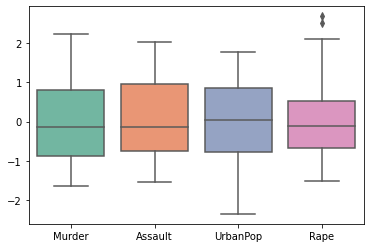

In [ ]:
diag_box2 = sns.boxplot(data=df_trans, orient="v", palette="Set2")

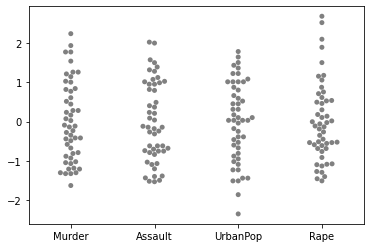

In [ ]:
diag_box2 = sns.swarmplot(data=df_trans, color="gray")

# k-Means Modelling

In [ ]:
# Initialize k-Means algorithm with k (= no of clusters)
kmeans = KMeans(n_clusters=4)

In [ ]:
print(kmeans) # n_clusters: Cluster Numbers - n_init: Center Names(How many times will we fit?)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [ ]:
# Apply k-Means algorithm to dataframe
k_fit= kmeans.fit(df)

In [ ]:
k_fit.n_clusters

4

In [ ]:
# Centers of Clusters for each feature
k_fit.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [ ]:
# Which urban in whick class
k_fit.labels_

array([1, 1, 1, 3, 1, 3, 2, 1, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 3, 1,
       0, 1, 3, 2, 2, 1, 0, 3, 1, 1, 1, 0, 2, 3, 3, 2, 3, 1, 0, 3, 3, 2,
       0, 3, 3, 0, 0, 3], dtype=int32)

## k-Means Visualisation

In [ ]:
kmeans= KMeans(n_clusters=2)   # Set k-Parameter to 2
k_fit = kmeans.fit(df)

In [ ]:
clusters = k_fit.labels_

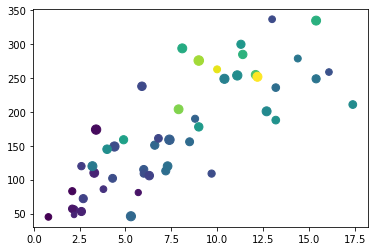

In [ ]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],)

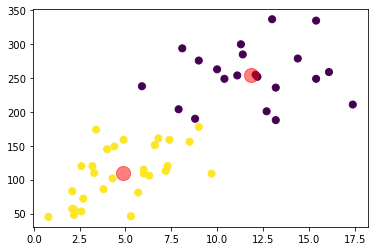

In [ ]:
# Scatterplot of 2 selected features
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="viridis")      
# Adding Centroids to the Scatterplot
centers = k_fit.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red",s = 200,alpha=0.5)         

## 3D Visualization

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# !pip install --upgrade matplotlib
# import mpl_toolkits

In [ ]:
# Set k-Means Parameter (no of clusters)
kmeans= KMeans(n_clusters=3)       
k_fit =kmeans.fit(df)
# Extract cluster labels and cluster centers
clusters= k_fit.labels_
centers = kmeans.cluster_centers_

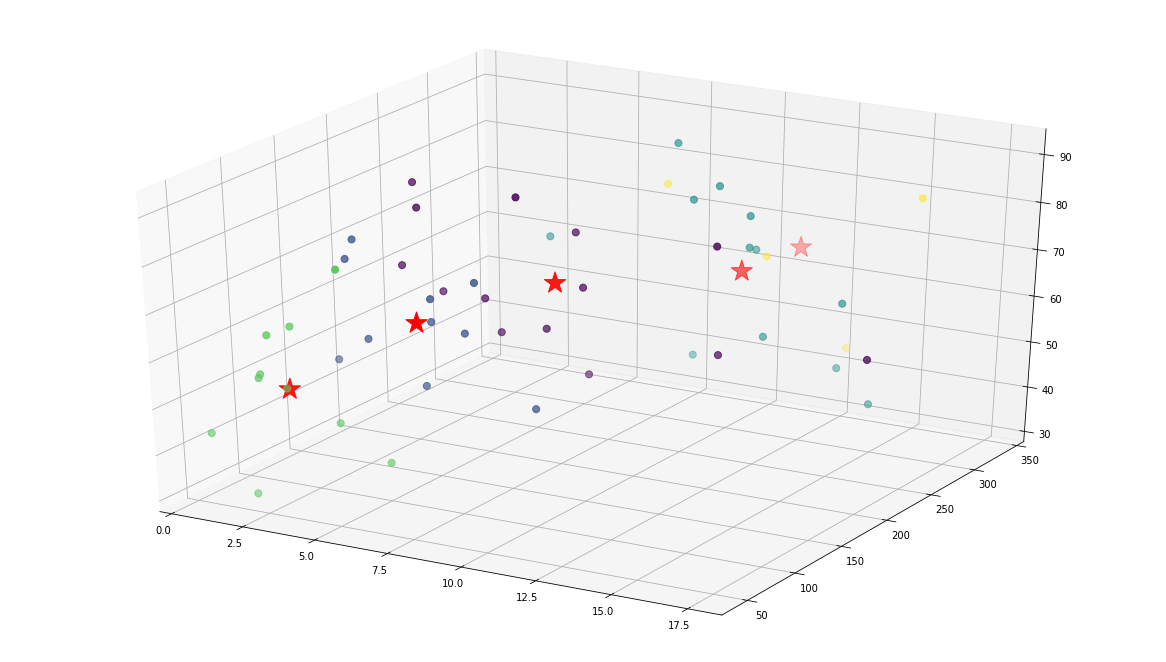

In [ ]:
plt.rcParams["figure.figsize"] =(16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=clusters,s=50,cmap="viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 500);

# Clusters and Observations

In [ ]:
# Set k-Means Parameter (no of clusters)
kmeans= KMeans(n_clusters=3)       
k_fit =kmeans.fit(df)
# Extract cluster labels
clusters= k_fit.labels_

In [ ]:
pd.DataFrame({"Urbans": df.index,"Clusters": clusters})[:10]

,Urbans,Clusters
0,Alabama,2
1,Alaska,2
2,Arizona,2
3,Arkansas,0
4,California,2
5,Colorado,0
6,Connecticut,1
7,Delaware,2
8,Florida,2
9,Georgia,0


In [ ]:
# Adding Cluster labels info to the dataframe
df["Clusters"] = clusters
df.head()

,Murder,Assault,UrbanPop,Rape,Clusters
State,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0


In [ ]:
df.Clusters.unique()

array([0, 1, 3, 2], dtype=int32)

In [ ]:
# There is a cluster called "0". 
# We want to avoid it, thus "incremening" cluster label no for each observation
df["Clusters"]=df["Clusters"]+1

In [ ]:
df.head(10)

,Murder,Assault,UrbanPop,Rape,Clusters
State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,4
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1


# ELBOW Method for Optimization of Cluster Numbers

We want high similarity(Max) inside clusters and low similarity(Min) inter clusters to find an optimized value of the sum of squared errors (SSR).

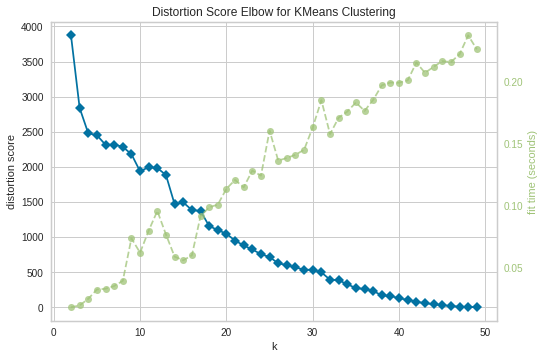

In [ ]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans= KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50)) # k: Number of cluster to be attempted
visualizer.fit(df)
visualizer.poof()

In [ ]:
kmeans= KMeans(n_clusters=9)
k_fit =kmeans.fit(df)
clusters= k_fit.labels_

In [ ]:
pd.DataFrame({"Urbans": df.index,"Clusters": clusters})[:10]

,Urbans,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,4
3,Arkansas,3
4,California,4
5,Colorado,3
6,Connecticut,0
7,Delaware,1
8,Florida,6
9,Georgia,3


# k-Medoid Modelling

Using "Partitioning Around Medoids" (PAM) as a variant of the clustering algorithm using "existing" observations as "centroids" of clusters

In [ ]:
# Configuration of the clustering algorithm
# Key Parameters: "metric" = distance function / n_clusters = Number of Clusters to detect
kmedoid = KMedoids(metric="manhattan", n_clusters=2, init="heuristic", max_iter=200)

In [ ]:
print(kmedoid)

KMedoids(max_iter=200, metric='manhattan', n_clusters=2)


In [ ]:
# Apply configured clustering algorithm to dataframe
km_fit= kmedoid.fit(df)
# Show detected number of clusters
km_fit.n_clusters

2

In [ ]:
# Show applied distance function
km_fit.metric

'manhattan'

In [ ]:
# Show calculated centroids
km_fit.cluster_centers_

array([[  6. , 115. ,  66. ,  18. ],
       [ 12.1, 255. ,  74. ,  35.1]])

In [ ]:
km_fit.labels_

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
# Extract cluster labels
clusters = km_fit.labels_

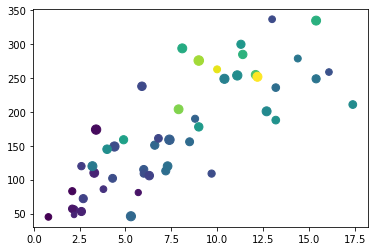

In [ ]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],)

In [ ]:
# Scatterplot of 2 selected features
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="viridis")     
# Adding Centroids to the Scatterplot
centers = km_fit.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red",s = 200,alpha=0.5)

NameError: ignored

# **ADDON:** Principal Component Analysis (PCA) for Dimension Reduction  

---
Principal Component Analysis (PCA) is a popular technique for deriving a set of low dimensional features from a larget set of variables. However, another popular application of PCA is visualizing higher dimensional data. 

For an indepth description of the "principal component analysis" (PCA) and R Example Script: https://rpubs.com/cyobero/pca-clustering

For a discussion of how to use PCA and Clustering in combination (incl. Python Sample Scripts): https://365datascience.com/tutorials/python-tutorials/pca-k-means

In [ ]:
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


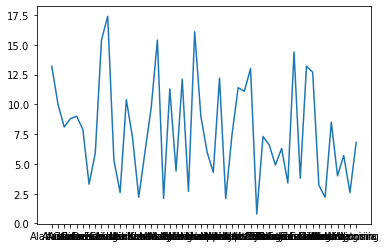

In [ ]:
# Plot a single feature (e.g. "Murder")
plt.plot(df.iloc[:,0])
plt.show()

In [ ]:
# Import PCA library from SKLEARN
from sklearn.decomposition import PCA

In [ ]:
# Configure the PCA algorithm (Key Parameter: no of components)
pca = PCA(n_components=2)
pca.set_params

<bound method BaseEstimator.set_params of PCA(n_components=2)>

In [ ]:
# Apply pca algorithm to dataframe
principalComponents = pca.fit_transform(df)

In [ ]:
# Show pca results
pca.n_samples_

50

In [ ]:
principalComponents.T

array([[  64.80216368,   92.82745016,  124.06821629,   18.34003541,
         107.42295313,   34.97598596,  -60.88728193,   66.73102545,
         165.24437032,   40.53517659, -123.53610577,  -51.79700225,
          78.9920973 ,  -57.55096073, -115.5867897 ,  -55.78969411,
         -62.38318061,   78.27763132,  -89.26104427,  129.3301355 ,
         -21.26628263,   85.45152667,  -98.95481552,   86.85635769,
           7.98628867,  -62.4836353 ,  -69.09654435,   83.61357844,
        -114.7773545 ,  -10.81572512,  114.8681626 ,   84.29423052,
         164.32551449, -127.49559655,  -50.08682167,  -19.6937229 ,
         -11.15023958,  -64.68914192,    3.06397257,  107.28106866,
         -86.10672005,   17.50626427,   31.29112174,  -49.9133974 ,
        -124.71446916,  -14.81744816,  -25.07583898,  -91.54464698,
        -118.17632786,  -10.43453939],
       [  11.4480074 ,   17.9829427 ,   -8.83040304,   16.70391138,
         -22.52006977,  -13.71958403,  -12.93253016,   -1.3537978 ,
         

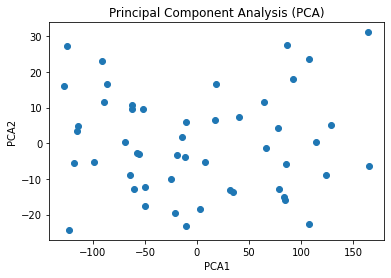

In [ ]:
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.title("Principal Component Analysis (PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()